In [23]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from sklearn.model_selection import train_test_split, cross_val_score

nltk.download('punkt')
nltk.download('stopwords')

data = pd.read_json('Sarcasm_Headlines_Dataset.json', lines=True)

def preprocess_text(text):
    text = re.sub(r'\W', ' ', str(text))
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

data['headline'] = data['headline'].apply(preprocess_text)

X_train, X_test, y_train, y_test = train_test_split(data['headline'], data['is_sarcastic'], test_size=0.2, random_state=42)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import string

class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return [self._preprocess_text(text) for text in X]

    def _preprocess_text(self, text):
        text = ''.join([char for char in text if char not in string.punctuation])
        tokens = word_tokenize(text)
        tokens = [word.lower() for word in tokens]
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]
        return ' '.join(tokens)

logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()
naive_bayes = MultinomialNB()
svm = SVC()

Logistic Regression Accuracy: 0.786035192811681


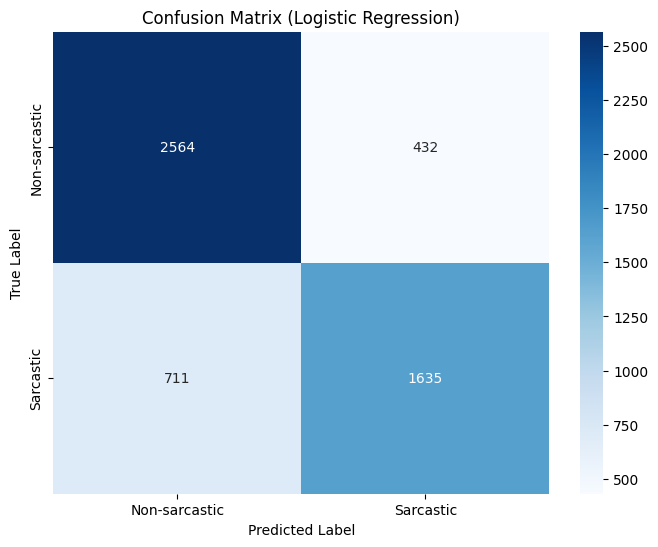

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      2996
           1       0.79      0.70      0.74      2346

    accuracy                           0.79      5342
   macro avg       0.79      0.78      0.78      5342
weighted avg       0.79      0.79      0.78      5342



In [25]:
pipeline_logreg = Pipeline([
    ('preprocessor', TextPreprocessor()),
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', logistic_regression)
])

pipeline_logreg.fit(X_train, y_train)
y_pred_logreg = pipeline_logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)

conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-sarcastic', 'Sarcastic'], yticklabels=['Non-sarcastic', 'Sarcastic'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_logreg))

Random Forest Accuracy: 0.7744290527892175


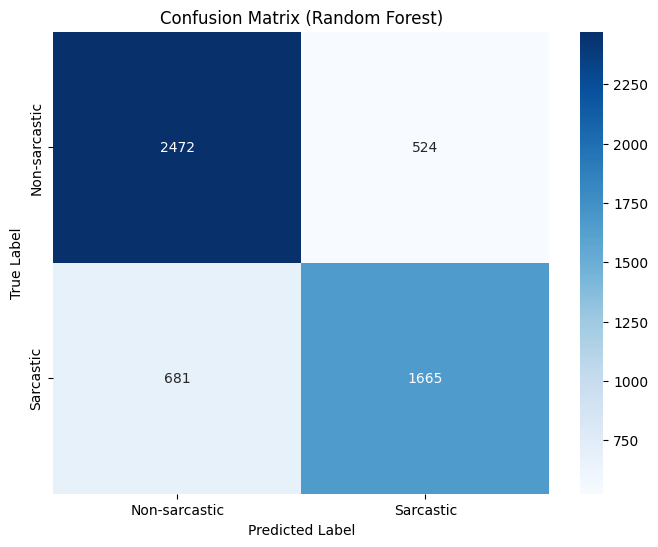

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.78      0.83      0.80      2996
           1       0.76      0.71      0.73      2346

    accuracy                           0.77      5342
   macro avg       0.77      0.77      0.77      5342
weighted avg       0.77      0.77      0.77      5342



In [26]:
pipeline_rf = Pipeline([
    ('preprocessor', TextPreprocessor()),
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', random_forest)
])

pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-sarcastic', 'Sarcastic'], yticklabels=['Non-sarcastic', 'Sarcastic'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

Naive Bayes Accuracy: 0.7821040808685885


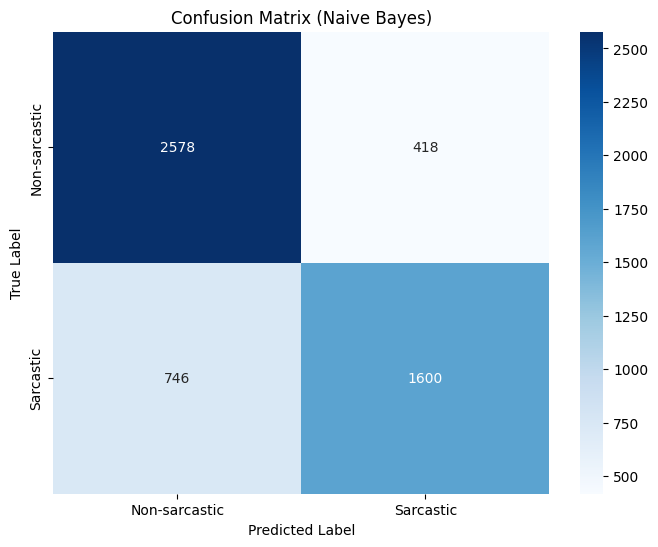

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      2996
           1       0.79      0.68      0.73      2346

    accuracy                           0.78      5342
   macro avg       0.78      0.77      0.77      5342
weighted avg       0.78      0.78      0.78      5342



In [27]:
pipeline_nb = Pipeline([
    ('preprocessor', TextPreprocessor()),
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', naive_bayes)
])

pipeline_nb.fit(X_train, y_train)
y_pred_nb = pipeline_nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-sarcastic', 'Sarcastic'], yticklabels=['Non-sarcastic', 'Sarcastic'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Naive Bayes)')
plt.show()

print("Classification Report (Naive Bayes):")
print(classification_report(y_test, y_pred_nb))

Support Vector Machines Accuracy: 0.7897791089479596


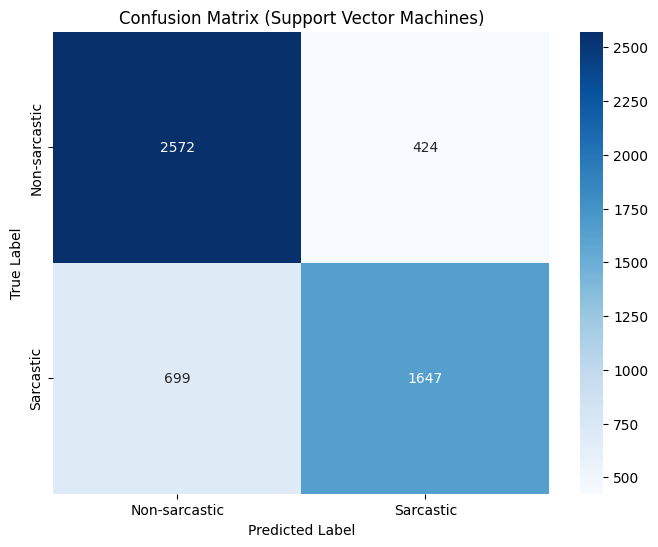

Classification Report (Support Vector Machines):
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      2996
           1       0.80      0.70      0.75      2346

    accuracy                           0.79      5342
   macro avg       0.79      0.78      0.78      5342
weighted avg       0.79      0.79      0.79      5342



In [28]:
pipeline_svm = Pipeline([
    ('preprocessor', TextPreprocessor()),
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', svm)
])

pipeline_svm.fit(X_train, y_train)
y_pred_svm = pipeline_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Support Vector Machines Accuracy:", accuracy_svm)

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-sarcastic', 'Sarcastic'], yticklabels=['Non-sarcastic', 'Sarcastic'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Support Vector Machines)')
plt.show()

print("Classification Report (Support Vector Machines):")
print(classification_report(y_test, y_pred_svm))